# Homework 1 : Collecting Data from Twitter, Data Exporation (100 points)

*------------

**Required Readings:** 
* The codes for [Chapter 1](http://bit.ly/1qCtMrr) and [Chapter 9](http://bit.ly/1u7eP33)


** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem 1 (30 points): Data Collection: Sampling Twitter Data with Twitter API about a certain topic

In [1]:
import twitter
import json
import re

## Problem 1.1 (20 points): Download more than 200 tweets from the same topic
* Select a topic that you are interested in, for example, "WPI" or "Lady Gaga"
* Use Twitter API to sample a collection of tweets about this topic in real time. The number of tweets should be larger than 200.

In [2]:
#---------------------------------------------
# Define a Function to Login Twitter API
def oauth_login():
    # Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    
    CONSUMER_KEY = 'GBqu9ZSEO0rsrZSAFMWBqWrpg'
    CONSUMER_SECRET ='xCuKPPe5tCeUwyAvGjQHUDPIzo47js1GLQ9onloRJOlhplQN4U'
    OAUTH_TOKEN = '791694118686715904-qqKbZoMBQqtC2AIdcUfCHPSOmtBC5XP'
    OAUTH_TOKEN_SECRET = 'UB1oQDPqAX4txwKbxZSVY4sOzsAg3zmqXuqbXi193kqBK'
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api
#----------------------------------------------

twitter_api = oauth_login()
query = 'Data mining'

# Setup initial arguments to the twitter API
arguments = {
    'q': query,
    'count': 100
}
statuses = []
# Twitter doesn't let us get more than 100 messages at a time, so we make 5 requests
for _ in range(5):
    # Make an API request and store the results in statuses.
    search_results = twitter_api.search.tweets(**arguments)
    statuses += search_results['statuses']
    try:
        # Modify the arguments variable for pagination
        next_results = search_results['search_metadata']['next_results']
        arguments['max_id'] = next_results.split('max_id=')[1].split('&')[0]
        arguments['include_entities'] = next_results.split('include_entities=')[1].split('&')[0]
    except KeyError, e: # No more results when next_results doesn't exist
        if len(statuses) <= 200:
            print "Could only get %d tweets when searching for '%s'" % (len(statuses), query)
        break


#---------
list_tweets = statuses

## Problem 1.2 (2 points): print the total number of tweets being collected. 
The number should be larger than 200. If it is smaller than 200, try to choose a popular topic in problem 1.1.

In [3]:
number_tweets = len(list_tweets)
print number_tweets

500


## Problem 1.3 (3 points): print the first 5 tweets in the list.

In [4]:
# Prints out the JSON of the first 5 tweets
# I've commented it out because the output is pretty ugly
# print json.JSONEncoder(indent=4, sort_keys=True).encode(list_tweets[0:5])

# For each tweet, print its user's screen name and the tweet's text
for tweet in list_tweets[0:5]:
    print '===> ' + tweet['user']['screen_name']
    print tweet['text']  

===> DTMsport
RT @FranTownsend: Peter Thiel’s CIA-backed data mining company wins court battle against the U.S. Army https://t.co/YAyz9NzqxE by @JennaMC_…
===> TankBag
RT @theintercept: Groups like @ACLU have argued that data-mining software created by Peter Thiel's company enables mass surveillance. https…
===> gangofcolour
@charliekirk11 he's a anti-democratic, anti-statist hack who helps the state with its surveillance  lol https://t.co/J8YjWBvCrO
===> Web_Scraping_US
#data #mining Intellectual property strategies for startups https://t.co/xCYrk00iyV #webscraping https://t.co/yfMjtsQoWF
===> carm2158
RT @theintercept: Groups like @ACLU have argued that data-mining software created by Peter Thiel's company enables mass surveillance. https…


## Problem 1.4 (5 points): save all the tweets into a local JSON file.
The size of the json file should be smaller than 20MB. If it is larger than 20M, reduce the number of tweets being downloaded in problem 1.1

In [5]:
json_file_name = 'tweets.json'
#------------
with open(json_file_name, 'w') as fp:
    json.dump(list_tweets, fp)

# Problem 2:(20 points) Extracting Tweet Entities 

## Problem 2.1 (10 points): load the tweets from the local json file

In [6]:
json_file_name = 'tweets.json'
#--------
with open(json_file_name, 'r') as fp:
    tweets = json.load(fp)

new_list_of_tweets = tweets

## Problem 2.2 (10 points):Extract a list of screen names for all the users being mentioned in these tweets
Note if a user has been mentioned for multiple times, the list should contain the user's screen name for mulitple times.


In [7]:
# use the *new_list_of_tweets* to extract the screen names
screen_names = []
for tweet in new_list_of_tweets:
    screen_names += [ user['screen_name'] for user in tweet['entities']['user_mentions']]

#-------------
list_screen_names = screen_names
print list_screen_names[0:10]

[u'FranTownsend', u'theintercept', u'ACLU', u'charliekirk11', u'theintercept', u'ACLU', u'theintercept', u'ACLU', u'theintercept', u'ACLU']


# Problem 3: Data Exploration (20 points) 

## Problem 3.1: Counting User mentions (10 points)
 Create a sorted list for the numbers of times each user being mentioned in the tweets.
 For example, if we have 5 users being mentioned 18 times, 15 times, ..., separately in all the tweets, the sort list should be like: [18, 15, 9, 7, 6]. 
Note the list should be sorted, with the largest number at the top of the list.

In [8]:
from operator import itemgetter
from collections import Counter

#### 
# # Count each screen names in a dict.
# screen_names_count = {}
# for screen_name in list_screen_names:
#     screen_names_count[screen_name] = 1+screen_names_count.get(screen_name, 0)
# # Gives us a list of (screen_names, count) in descending order
# screen_names_and_count = sorted(screen_names_count.items(), key=itemgetter(1), reverse=True)

# Clean way of doing the same thing
screen_names_and_count = Counter(screen_names).most_common()

#-------------
list_screen_name_counts = [count for screen_name, count in screen_names_and_count]
print list_screen_name_counts[:10]

[101, 29, 21, 12, 11, 10, 10, 10, 8, 6]



## Problem 3.2: Visualization: Histogram (10 points)
Plot a histogram of the number of user mentions in the list (list_screen_name_counts) using the following bins.

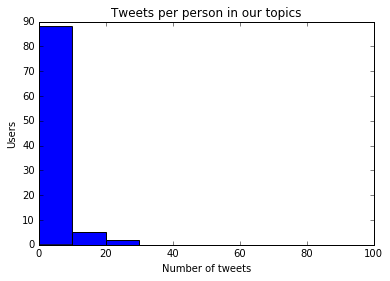

In [9]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

bins=[0, 10, 20, 30, 40, 50, 100]
#---------------

n, bins, patches = plt.hist(list_screen_name_counts, bins)

plt.title('Tweets per person in our topics')
plt.ylabel('Users')
plt.xlabel('Number of tweets')
plt.show()

# Problem 4: Statistics of Data Attributes (30 points)
## Problem 4.1: Mode (10 points)
Compute the **Mode** of the attribute *screen_name_counts*. Assuming that the attribute is the same as the list (list_screen_name_counts)


In [10]:
# If screen_name_counts doesn't exist, make it use list_screen_name_counts
# Mostly for testing
try:
    screen_name_counts
except:
    screen_name_counts = list_screen_name_counts

# Could use scipy.stats's mode(some_list)
# Or, we could use Counter(some_list).most_common()[0][0]
# But, let's just implement it ourselves:

# Make a dictionary of tweets_per_user => occurances_of_that_count
count_occurances = {}
for screen_name in screen_name_counts:
    count_occurances[screen_name] = 1+count_occurances.get(screen_name, 0)

# Get a list of (counts, occurances)
counts_and_occurances = sorted(count_occurances.items(), key=itemgetter(1), reverse=True)

print "Most people (%d out of %d) have %d post(s) in the list." % (counts_and_occurances[0][1], len(screen_name_counts), counts_and_occurances[0][0])

#------------
Mode_of_screenname_counts= counts_and_occurances[0][0]
print Mode_of_screenname_counts

Most people (59 out of 96) have 1 post(s) in the list.
1


## Problem 4.2: Median (10 points)
Compute the **Median** of the attribute *screen_name_counts*. Assuming that the attribute is the same as the list (list_screen_name_counts)

In [11]:
length = len(screen_name_counts)
median = screen_name_counts[int(length/2.0-0.5)] if length % 2 else (screen_name_counts[length/2-1] + screen_name_counts[length/2])/2.0
#------------
Median_of_screenname_counts= median#<insert your variable>
print Median_of_screenname_counts

1.0


## Problem 4.2: Range (10 points)
Compute the **Range** of the attribute *screen_name_counts*: we assume that the attribute is the same as the list (list_screen_name_counts)

In [13]:
maximum = screen_name_counts[0]
minimum = screen_name_counts[-1]
#------------
Range_of_screenname_counts= maximum - minimum
print Range_of_screenname_counts

100


*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **JSON file**: please include the json file for the tweets that you collected. Please make sure the JSON file is smaller than 20MB.


* Please compress both files in a **zip file**.


** How to submit: **
  Please submit your **zip file** through myWPI, in the Assignment "Homework 1".